In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

from IPython import display



In [2]:
LAYER_BLOCKS = 0
LAYER_COINS = 1
LAYER_ENEMIES = 2
NLAYERS = 3

class GameMap:
    def __init__(self):
        self.levels = []
        self.widths = []
        self.heights = []
        self.nmaps = 0
        
        with open("Zelda/zelda.json") as f:
            self.tiledefs = json.load(f)
            #print(self.tiledefs)
        
        for fname in sorted(glob.glob("Zelda/zelda/zelda_lvl*.txt")):
            #print(fname)
            with open(fname) as f:
                data = [line.strip() for line in f.readlines()]
                self.levels.append(data)
                self.heights.append(len(data))
                self.widths.append(len(data[0]))
                self.nmaps += 1


    def getMaps(self, level=0):
        layers = np.ndarray((self.heights[level], self.widths[level], NLAYERS))
        layers.fill(0)
        for r, row in enumerate(self.levels[level]):
            for c, tile in enumerate(row):
                if tile in ('1','2','3'):
                    layers[r,c,LAYER_ENEMIES] = 1
                elif tile in ('+'):
                    layers[r,c,LAYER_COINS] = 1
                elif tile in ('w'):
                    pass
                else:
                    layers[r,c,LAYER_BLOCKS] = 1
                
        return layers
            
            

In [3]:
gm = GameMap()
a = np.concatenate([gm.getMaps(i) for i in range(gm.nmaps)], axis=1)
at = a.transpose()
at[1,].shape
at.shape
#print(json.dumps(gm.tiledefs, indent=2))

(3, 65, 9)

(0.0, 75.0)

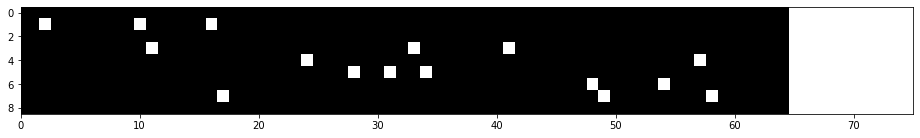

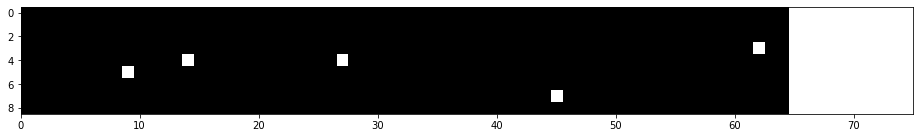

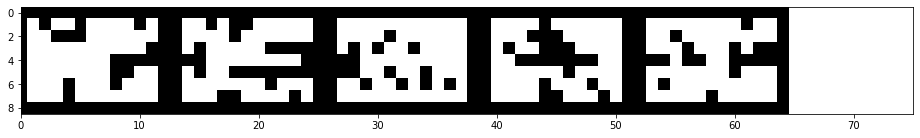

In [4]:
fig, axes = plt.subplots(1,1,figsize=(16,4))
axes.imshow(at[2,].transpose(),cmap="gray", interpolation="nearest")
axes.set_xlim(0,75)
fig, axes = plt.subplots(1,1,figsize=(16,4))
axes.imshow(at[1,].transpose(),cmap="gray", interpolation="nearest")
axes.set_xlim(0,75)
fig, axes = plt.subplots(1,1,figsize=(16,4))
axes.imshow(at[0,].transpose(),cmap="gray", interpolation="nearest")
axes.set_xlim(0,75)

In [22]:
hiddensize = 9
model = Sequential()
model.add(Dense(hiddensize, input_shape=(9,3)))
model.add(Activation("relu"))
model.add(Dense(9))
# leaving off this final relu seems to do a much better job
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))

# "mse" seems to be the best loss function for the problem
# "RMSprop" seems to be the best, with "adadelta" also good
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])



In [23]:
model = Sequential()
model.add(Dense(7, input_shape=(9,)))
model.add(Activation("relu"))
model.add(Dropout(.05))

model.add(Dense(3))
model.add(Activation("relu"))
model.add(Dropout(.05))

model.add(Dense(7))
model.add(Activation("relu"))
model.add(Dropout(.05))

model.add(Dense(9))

# leaving off this final relu seems to do a much better job.  I think you don't want
# your final activation to be something with hard cutoffs.
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))

# "mse" seems to be the best loss function for the problem
# "RMSprop" seems to be the best, with "adadelta" also good
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])



In [16]:
print(at[LAYER_BLOCKS])

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 1. 1. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0. 1. 0.]
 [0. 1. 1.

In [17]:
print(at[LAYER_COINS])

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

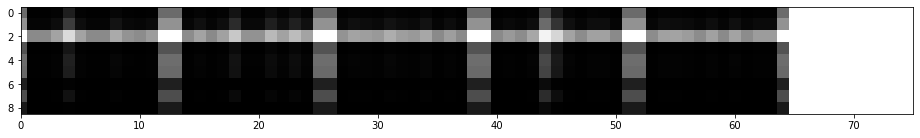

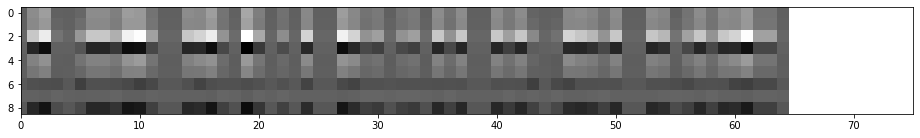

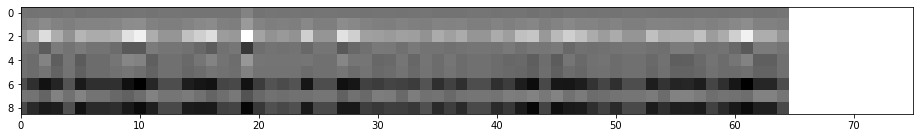

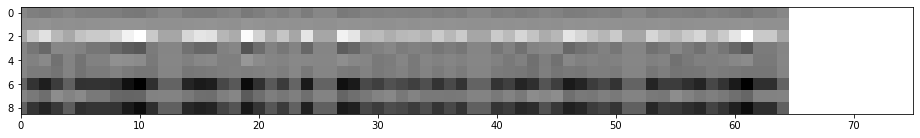

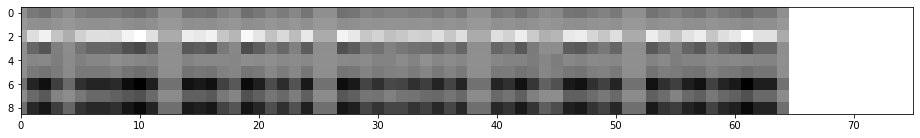

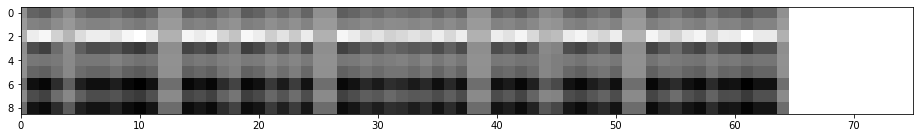

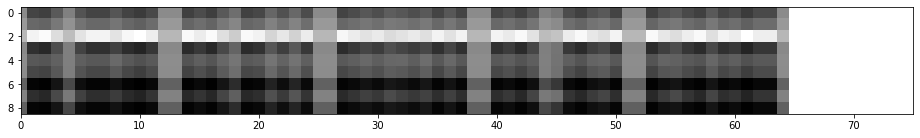

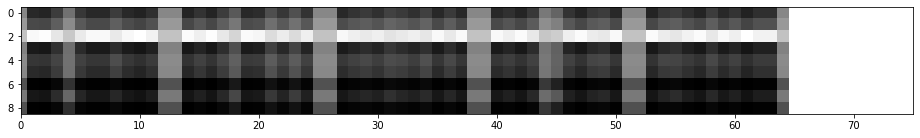

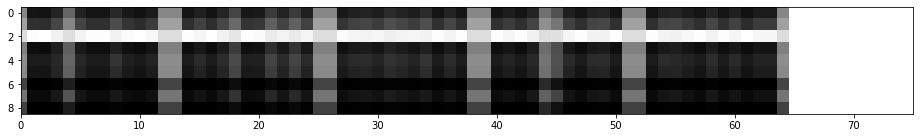

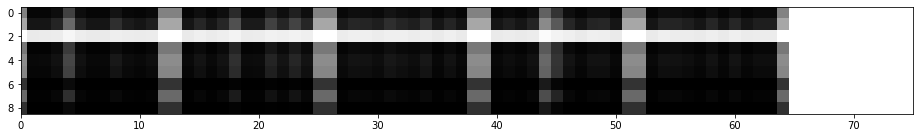

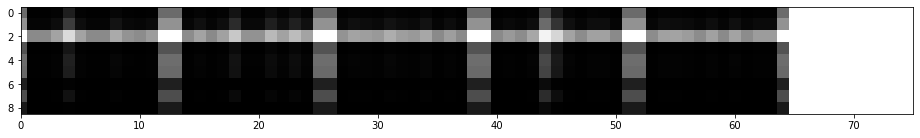

In [24]:
for i in range(10):
    model.fit(at[LAYER_BLOCKS], at[LAYER_COINS], epochs=50, batch_size=65, shuffle=True, verbose=False)
    pt = model.predict(at[LAYER_BLOCKS])
    p = pt.transpose()
    fig, axes = plt.subplots(1,1,figsize=(16,4))
    axes.imshow(p,cmap="gray", interpolation="nearest")
    axes.set_xlim(0,75)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #axes[1].imshow(a,cmap="gray", interpolation="nearest")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


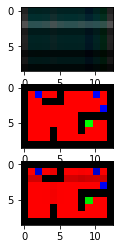

In [25]:
test_a = gm.getMaps(0)
test_at = test_a.transpose()
test_pt = model.predict(test_at)
test_p = test_pt.transpose()
fig, axes = plt.subplots(3,1,figsize=(16,4))
axes[0].imshow(test_p,cmap="gray", interpolation="nearest")
axes[1].imshow(test_a,cmap="gray", interpolation="nearest")
axes[2].imshow(test_a-test_p, interpolation="nearest", cmap="hot", vmin=-1, vmax=1)


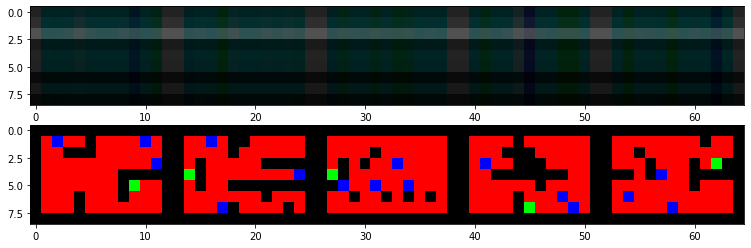

In [26]:
pt = model.predict(at)
p = pt.transpose()
fig, axes = plt.subplots(2,1,figsize=(16,4))
axes[0].imshow(p,cmap="gray", interpolation="nearest")
axes[1].imshow(a,cmap="gray", interpolation="nearest")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


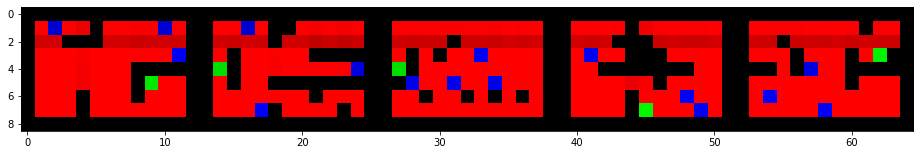

In [27]:
pt = model.predict(at)
p = pt.transpose()
fig, axes = plt.subplots(1,1,figsize=(16,4))
axes.imshow(a-p,cmap="gray", interpolation="nearest")
